In [191]:
import numpy as np

In [192]:
# balls
# step 1
blue = 9
yellow = 11
total_parent = blue + yellow
p_blue = blue / total_parent
p_yellow = yellow / total_parent
p_blue, p_yellow

(0.45, 0.55)

In [193]:
e0 = -(p_blue * np.log2(p_blue) + p_yellow * np.log2(p_yellow))
e0

0.9927744539878083

In [194]:
# step 2 split total on two branches left & right

In [195]:
# left branch
blue = 8
yellow = 5
total_left_child = blue + yellow
p_blue = blue / total_left_child
p_yellow = yellow / total_left_child
p_blue, p_yellow

(0.6153846153846154, 0.38461538461538464)

In [196]:
e1l = -(p_blue * np.log2(p_blue) + p_yellow * np.log2(p_yellow))
e1l

0.9612366047228759

In [197]:
# right branch
blue = 1
yellow = 6
total_right_child = blue + yellow
p_blue = blue / total_right_child
p_yellow = yellow / total_right_child
p_blue, p_yellow

(0.14285714285714285, 0.8571428571428571)

In [198]:
e1r = -(p_blue * np.log2(p_blue) + p_yellow * np.log2(p_yellow))
e1r

0.5916727785823275

In [199]:
# Information gain
ig = e0 - total_left_child/total_parent * e1l - total_right_child/total_parent * e1r
ig

0.16088518841412436

In [200]:
# Gini
def gini(labels):
    classes = {}

    # counter different classes
    for label in labels:
        if not classes[label]:
            classes[label] = 0

        classes[label] += 1

    # gini criterion
    gini = 1
    for class_name in classes:
        p = classes[class_name] / len(classes)
        gini -= p**2

    return gini

In [201]:
def gini(labels):
    labels = list(labels)
    labels_set = set(labels)

    gini = 1
    for name in labels_set:
        p = labels.count(name) / len(labels)
        gini -= p**2

    return gini

In [202]:
labels = ['red', 'red', 'blue', 'blue', 'blue']

labels_set = set(labels)

gini_test = 1

for name in labels_set:
    p = labels.count(name) / len(labels)
    gini_test -= p**2
    print(gini_test)

0.84
0.48


In [203]:
def gain(left_labels, right_labels, root_criterion, criterion):
    # left lobe
    p_left = float(left_labels.shape[0] / (left_labels.shape[0] + right_labels.shape[0]))
    gain_result = root_criterion - p_left * criterion(left_labels) - (1 - p_left) * criterion(right_labels)

    return gain_result

In [204]:
import pandas as pd
df = pd.read_csv('data/cardio.csv', sep=';')
df = df.iloc[:5]

features = ['age', 'gender', 'height']
target = ['cardio']

df = df.iloc[:5][features + target]
df

,age,gender,height,cardio
0,50,2,168,0
1,55,1,156,1
2,51,1,165,1
3,48,2,169,1
4,47,1,156,0


In [205]:
# For classification
# root_criterion = gini(np.concatenate((labels_left, labels_right)))
# gain(labels_left, labels_right, root_criterion, gini)
# cardio compute
gini0 = gini(df['cardio'])
gini0

0.48

In [206]:
# threshold
t = 50.5

df1 = df[df['age'] <= t]
df2 = df[df['age'] > t]
display(df1, df2)

,age,gender,height,cardio
0,50,2,168,0
3,48,2,169,1
4,47,1,156,0


,age,gender,height,cardio
1,55,1,156,1
2,51,1,165,1


In [207]:
gini_left = gini(df1['cardio'])
gini_right = gini(df2['cardio'])
display(gini_left, gini_right)

0.4444444444444445

0.0

In [208]:
gain(df1['cardio'], df2['cardio'], gini0, gini)

0.21333333333333332

[Text(0.5, 0.75, 'age <= 50.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1')]

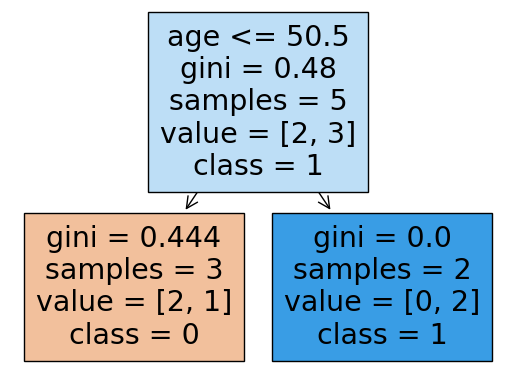

In [209]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
df_clsf = DecisionTreeClassifier(random_state=1, max_depth=1) # deep 1
df_clsf.fit(df[features], df[target])
plot_tree(df_clsf, feature_names=features, class_names=['0', '1'], filled=True, impurity=True)
# impurity=True show Gini  criterion

In [210]:
# For regression
features = ['gender', 'height', 'cardio']
target = ['age']

def mse(array):
    mean = array.mean()
    return np.mean((array - mean)**2)

mse(df['height'])

32.559999999999995

In [211]:
def mae(array):
    mean = array.mean()
    return np.mean(np.abs(array - mean))

In [212]:
df1 = df[df['cardio'] <= 0.5]
df2 = df[df['cardio'] > 0.5]
display(df1, df2)

,age,gender,height,cardio
0,50,2,168,0
4,47,1,156,0


,age,gender,height,cardio
1,55,1,156,1
2,51,1,165,1
3,48,2,169,1


[Text(0.5, 0.75, 'cardio <= 0.5\nsquared_error = 7.76\nsamples = 5\nvalue = 50.2'),
 Text(0.25, 0.25, 'squared_error = 2.25\nsamples = 2\nvalue = 48.5'),
 Text(0.75, 0.25, 'squared_error = 8.222\nsamples = 3\nvalue = 51.333')]

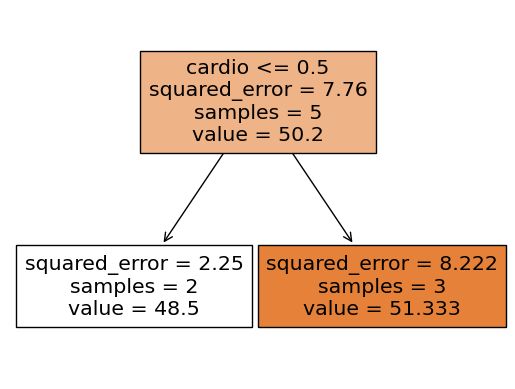

In [213]:
from sklearn.tree import DecisionTreeRegressor
df_reg = DecisionTreeRegressor(random_state=1, max_depth=1)
df_reg.fit(df[features], df[target])

plot_tree(df_reg, feature_names=features, filled=True, impurity=True)

In [214]:
root_criterion = mse(df['age'])
print(mae(df['age']), mae(df1['age']), mse(df2['age']))
print(mae(df['age']), mse(df1['age']), mse(df2['age']))

2.2400000000000007 1.5 8.222222222222221
2.2400000000000007 2.25 8.222222222222221


In [215]:
gain(df1['age'], df2['age'], root_criterion, mse)

1.9266666666666676